Importing the necessary libraries

In [13]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install Levenshtein

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Schukuratsu/Python-cv2-fast-thinning-algorithm/blob/master/ftlib.py to /tmp/pip-install-9l461skh/thinning_454c0aabaee84cce93758a715acdd1aa
  Running command git clone --filter=blob:none --quiet https://github.com/Schukuratsu/Python-cv2-fast-thinning-algorithm/blob/master/ftlib.py /tmp/pip-install-9l461skh/thinning_454c0aabaee84cce93758a715acdd1aa
  fat

In [2]:
# import the necessary libraries
import os # for handling the directory
from google.colab import drive # to access the drive
import csv # to parse the dataset
import cv2 # to read and process images
from google.colab.patches import cv2_imshow # for visualization
import pytesseract # OCR model that converts images to string
import Levenshtein as lev # for performance analysis

Configuring the directory and importing the dataset(s)

In [3]:
# NOTE: make sure to have the "Apply AI Group 30" folder saved as a shortcut under "MyDrive" !!!
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


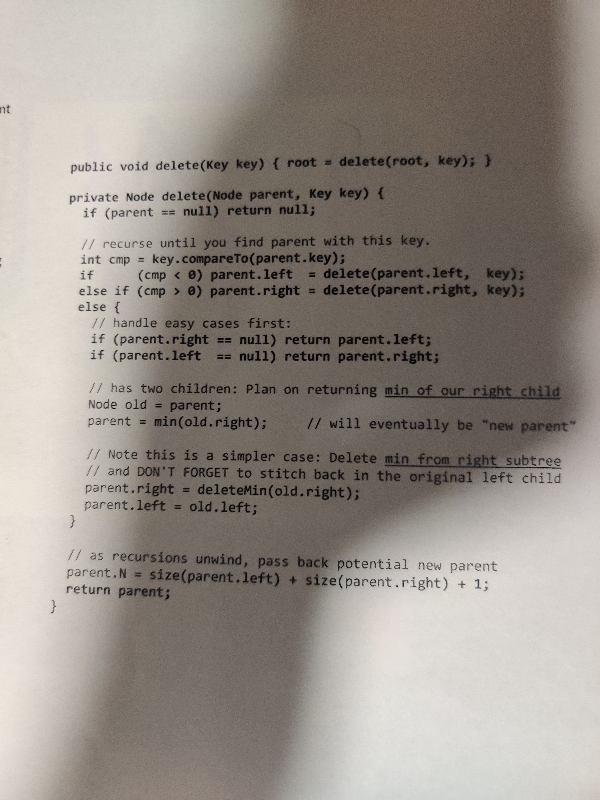

In [4]:
# locates image
example_img_dir = '/content/drive/MyDrive/Apply AI Group 30/OCR_project/resources/test_image_2.jpg'
# example_img_dir = '/content/drive/MyDrive/Apply AI Group 30/OCR_project/resources/handmade_dataset/img_27.jpg'

# reads image
example_img = cv2.imread(example_img_dir)

# calculates new height and width
height, width, dim = example_img.shape
resized_height = int(height/5)
resized_width = int(width/5)

# resizes image for viewing convenience
example_img = cv2.resize(example_img, (resized_width, resized_height))

# displays image
cv2_imshow(example_img)

In [5]:
# reads image and converts it to grayscale
grayscale_img = cv2.imread(example_img_dir, 0)

'''# calculates new height and width
height, width = grayscale_img.shape
resized_height = int(height/5)
resized_width = int(width/5)

# resizing for viewing convenience
grayscale_img = cv2.resize(grayscale_img, (resized_width, resized_height))'''

# displaying image
cv2_imshow(grayscale_img)

Output hidden; open in https://colab.research.google.com to view.

In [6]:
# blurs the image
blurred_img = cv2.GaussianBlur(grayscale_img, (13, 13), cv2.BORDER_DEFAULT)
cv2_imshow(blurred_img)

Output hidden; open in https://colab.research.google.com to view.

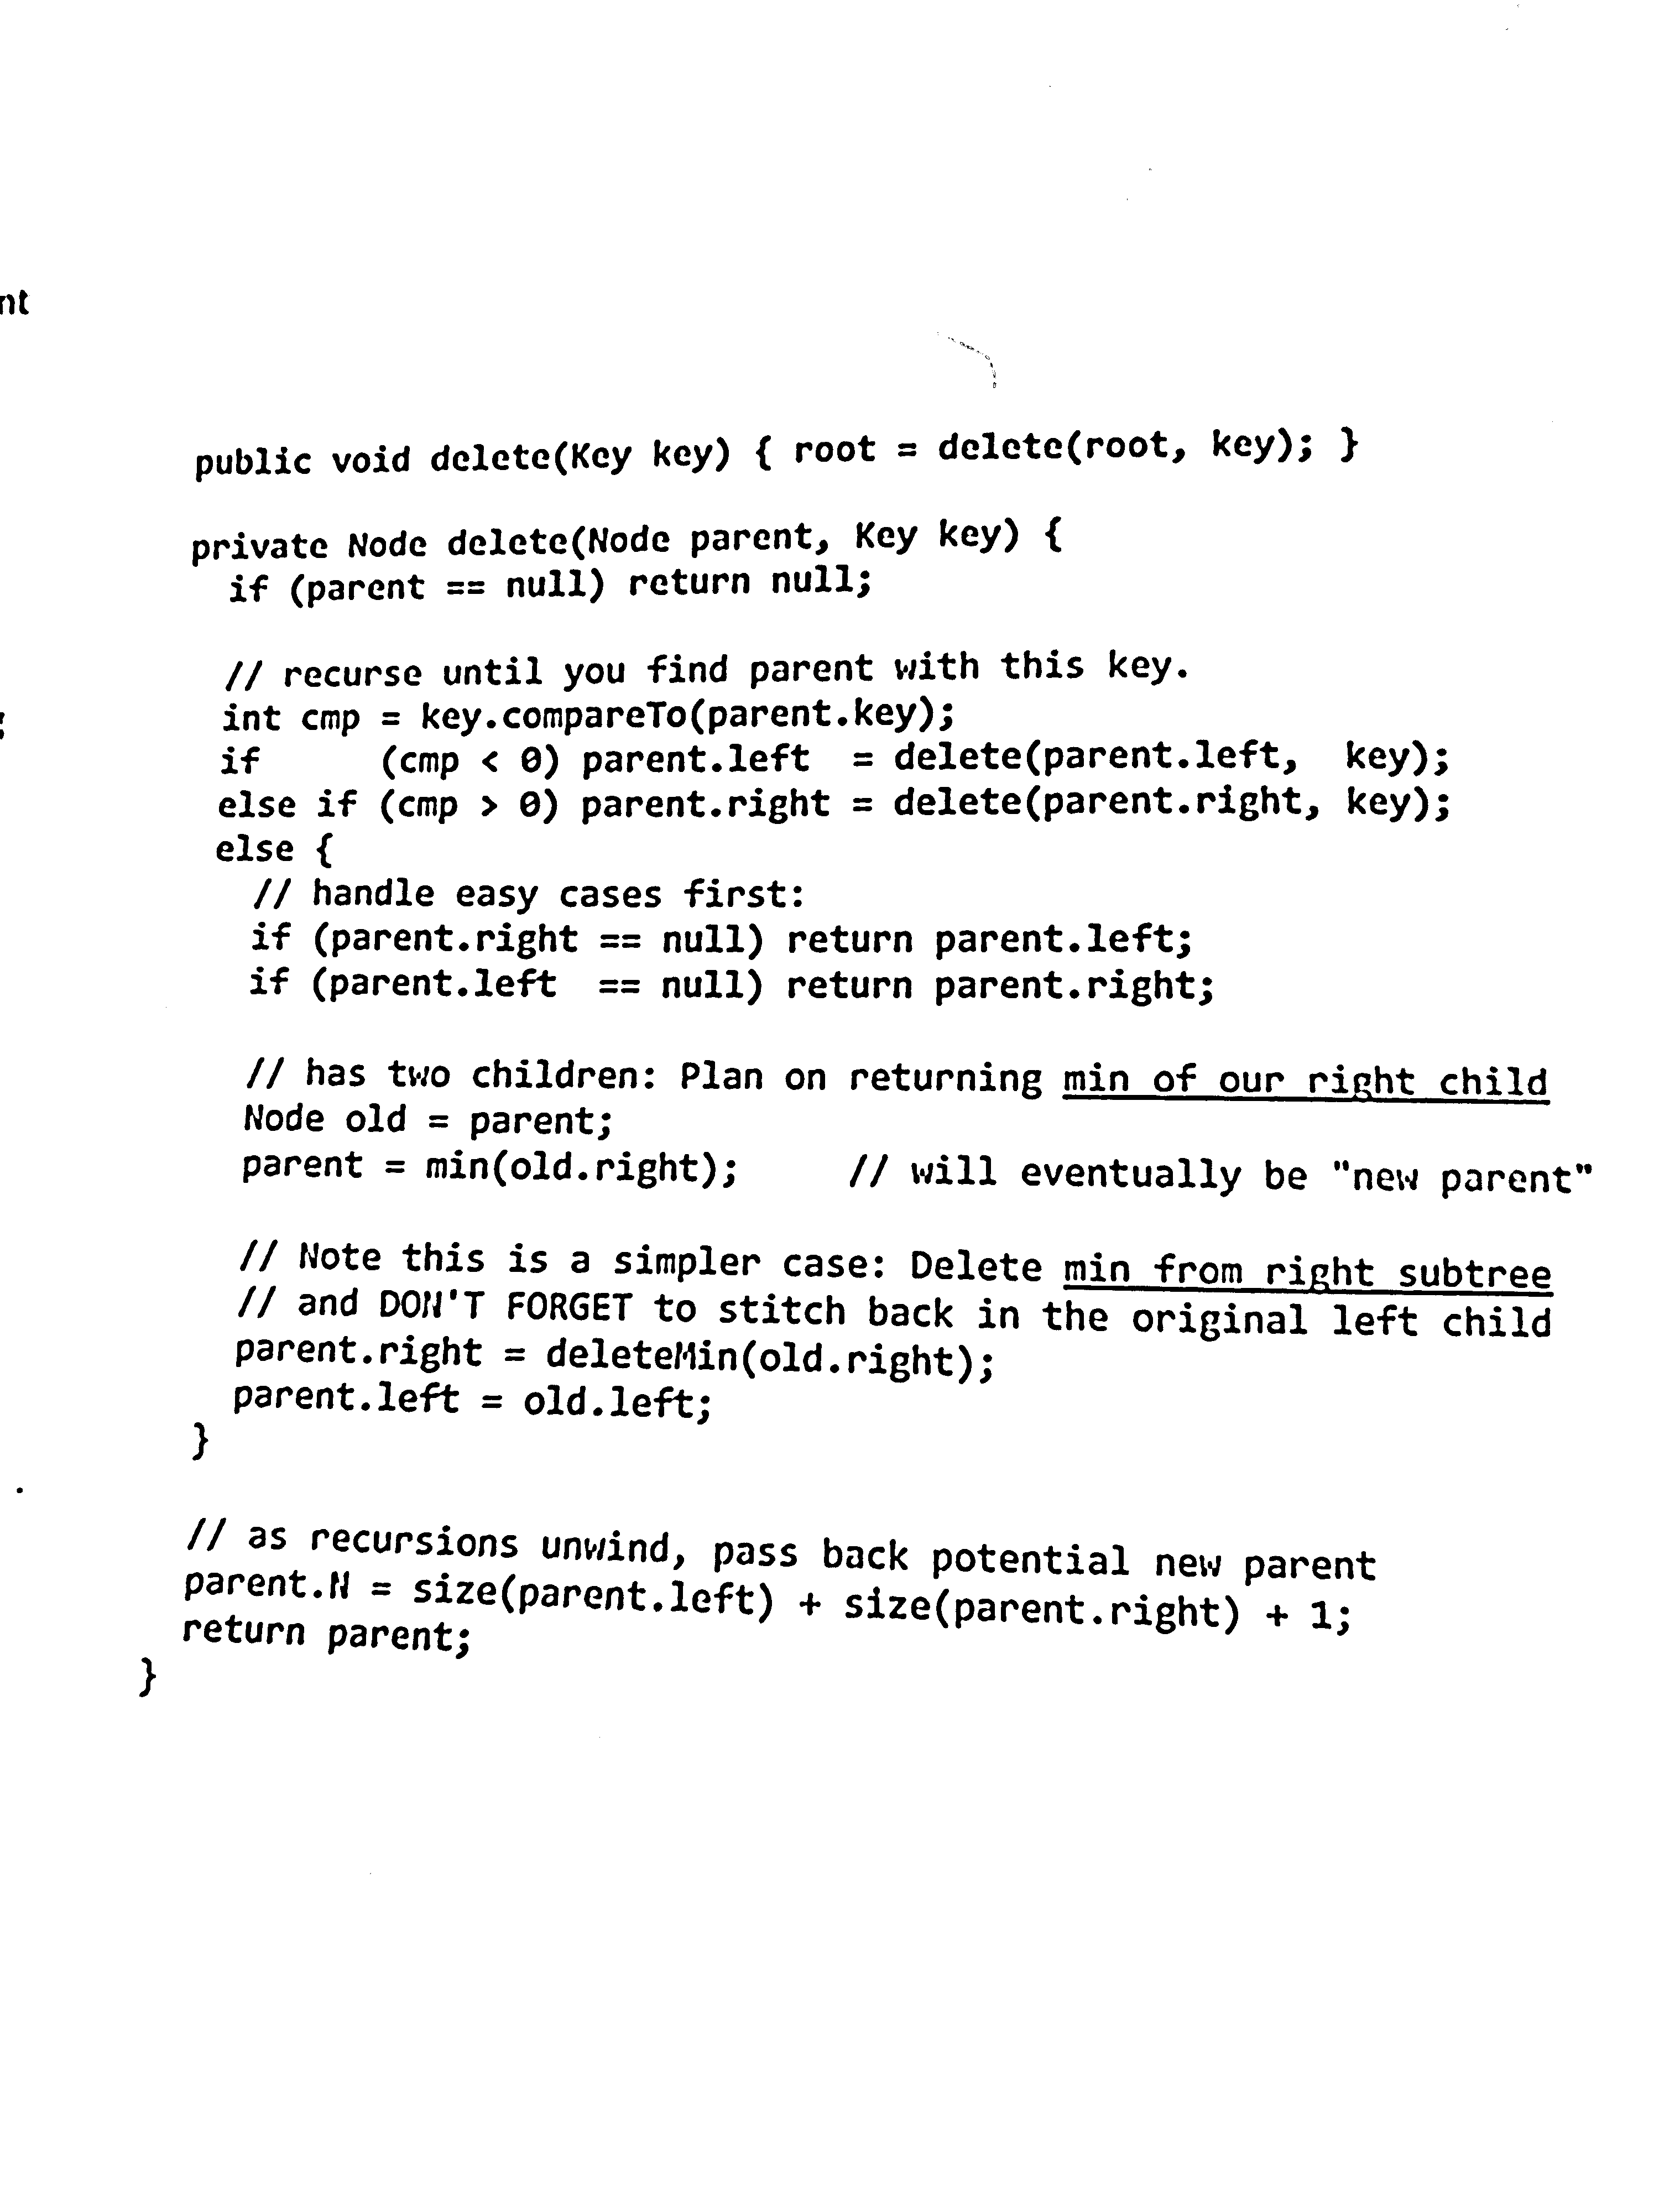

In [7]:
# sharpens the image
# works well for images where illumination varies between parts of image
adaptive_thresh_img = cv2.adaptiveThreshold(blurred_img,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
cv2_imshow(adaptive_thresh_img)

In [14]:
# convert image into string
string = pytesseract.image_to_string(adaptive_thresh_img)

In [15]:
string

'nt\n\npublic void delete(Key key) { root = delete(root, key); }\n\nprivate Node delete(Node parent, Key key) {\nif (parent == null) return null;\n\n// recurse until you find parent with this key.\n\nint cmp = key.compareTo(parent.key) 5\n| if (cmp < ©) parent.left = delete(parent.left, key);\nelse if (cmp > @) parent.right = delete(parent.right, key);\n\nelse {\n// handle easy cases first:\nif (parent.right == null) return parent.left;\n\nif (parent.left == null) return parent.right;\n\n// has two children: Plan on returning min of our right child\n\nNode old = parent;\nparent = min(old.right); // will eventually be "new parent"\n\n// Note this is a simpler case: Delete min from right subtree\n\n// and DON\'T FORGET to stitch back in the Original left child\nparent.right = deleteMin(old.right);\nparent.left = old.left;\n\n}\n\n// as recursions unwind, pass back potential new parent\nparent. = Size(parent.left) + size(parent.right) + 1;\nreturn parent;\n\n}\n\x0c'

In [16]:
# truncate the '\x0c' from the end of the string
string = string[:len(string)-1]

# remove all instances of '\n' from the outputted string
string = string.replace('\n', '')

In [17]:
string

'ntpublic void delete(Key key) { root = delete(root, key); }private Node delete(Node parent, Key key) {if (parent == null) return null;// recurse until you find parent with this key.int cmp = key.compareTo(parent.key) 5| if (cmp < ©) parent.left = delete(parent.left, key);else if (cmp > @) parent.right = delete(parent.right, key);else {// handle easy cases first:if (parent.right == null) return parent.left;if (parent.left == null) return parent.right;// has two children: Plan on returning min of our right childNode old = parent;parent = min(old.right); // will eventually be "new parent"// Note this is a simpler case: Delete min from right subtree// and DON\'T FORGET to stitch back in the Original left childparent.right = deleteMin(old.right);parent.left = old.left;}// as recursions unwind, pass back potential new parentparent. = Size(parent.left) + size(parent.right) + 1;return parent;}'